# Food Marketing Analysis : A Data Analytics Approach

## Business Problem 
UFood is the lead food delivery app in Brazil, present in over a thousand cities. 

Keeping a high customer engagement is key for growing and consolidating the company’s  
position as the market leader. 

Data Analysts working within the data team are constantly challenged to provide insights and value to the company through open scope projects. This case intends to simulate that. 
In this case, you are presented a sample dataset, that mocks metainformation on the customer and on UFood campaign interactions with that customer. 

It is your challenge to understand the data, find business opportunities & insights and to propose any data driven action to optimize the campaigns results & generate value to the company. You should consider that you have to present your results to both technical and business  
stakeholders.

#### Key Objectives are: 
- Explore the data – don’t just plot means and counts. Provide insights, define cause and  effect. Provide a better understanding of the characteristic features of respondents; 
- Propose and describe a customer segmentation based on customers behaviors; 
- Visualize data and provide written reasoning behind discoveries; 
#### The Company 
Consider a well-established company operating in the retail food sector. Presently they have around several hundred thousands of registered customers and serve almost one million consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products. These can further be divided into gold and regular products. The customers can order and acquire products through 3 sales channels: physical stores, catalogs and company’s website. Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason, several strategic initiatives are being considered to invert this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns. 

#### The Marketing Department 
The marketing department was pressured to spend its annual budget more wisely. Desirably, the success of these activities will prove the value of the approach and convince the more skeptical within the 
company. 

## Phase 1: Ask
#### Dissecting this big picture into 5 SMART questions
- Which Age Group Accepts Campaigns the Most?
- Which Age Group Spends the Most Money on Purchases?
- Does Family Structure and Marital Structure Influence Campaign Acceptance?
- Does Education Level Impact Campaign Response?
- Which Sales Channel is Most Effective for Campaigns?

## Phase 2: Prepare
#### Load the dataset.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
food = pd.read_csv(r"D:\Data_Analysis_Projects\Pandas\u_food_marketing.csv")
pd.set_option('display.max.rows', 2300)
pd.set_option('display.max.columns', 50)

In [11]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


## Phase 3: Process

### 3.1 Data Cleaning
- **Removing Duplicates**

In [13]:
food.drop_duplicates(keep = False, inplace = True)

### 3.2 Data Transformation
Since the data columns are not in a directly usable form for analysis, several transformations including combining, mapping, and categorizing columns create a more structured representation and informative dataset. Here are the logs of the transformation steps performed.
- **Combine Kidhome and Teenhome column** and create Total_Children column(represents total number of children in the home
- **Map 5 different marital status columns into a single Marital_Status_Str column** holding the corresponding marital status string value.
- **Map the five education category columns into a single Education_Status column** that holds the corresponding education level as a string value.
- **Combine 5 campaigns columns into a single Accepted_Campaigns column** that indicates whether the customer accepted any of the campaigns
- **Categorize the Age column into six different categories** and store them in the separate Age_Group column.

In [15]:
# Combine Kidhome and Teenhome column 
food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis = 1)

In [17]:
# Map 5 different marital status columns into a single Marital_Status_Str column
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5, 0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4, 0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3, 0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2, 0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1, 0:0})

In [19]:
food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis = 1)

In [21]:
food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [23]:
# Map the five education category columns into a single Education_Status column 
food['education_PhD'] = food['education_PhD'].replace({1:5, 0:0})
food['education_Master'] = food['education_Master'].replace({1:4, 0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3, 0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2, 0:0})
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1, 0:0})

In [25]:
food['Education_Status'] = food[['education_PhD', 'education_Master', 'education_Graduation', 'education_Basic', 'education_2n Cycle']].sum(axis = 1)

In [27]:
# Combine 5 campaigns columns into a single Accepted_Campaigns column
food['Accepted_Campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis = 1)

In [31]:
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

In [33]:
# Categorize the Age column into six different categories
age_groups = [(23, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 85)]

def assign_age_groups(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return('Unknown')

food['Age Group'] = food['Age'].apply(assign_age_groups)
    

## Phase 4: Analyzing and Visualizing

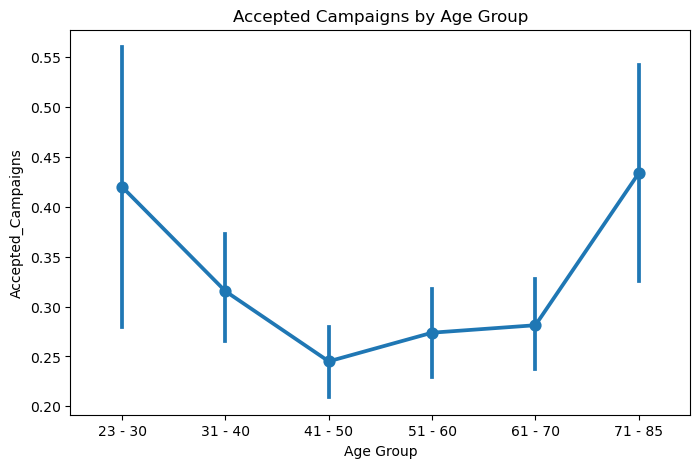

In [69]:
plt.figure(figsize = (8, 5))
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']
sns.pointplot(data = food, x = 'Age Group', y = 'Accepted_Campaigns', order = age_order)
plt.title('Accepted Campaigns by Age Group')
plt.show()

In [71]:
food.groupby('Age Group')['Accepted_Campaigns'].sum().reset_index()

,Age Group,Accepted_Campaigns
0,23 - 30,21
1,31 - 40,94
2,41 - 50,150
3,51 - 60,112
4,61 - 70,110
5,71 - 85,36


In [77]:
food_percent = food['Age Group'].value_counts().reset_index()
food_percent['percentage'] = (food_percent['count'] / food.shape[0])
food_percent.sort_values('Age Group', inplace = True)

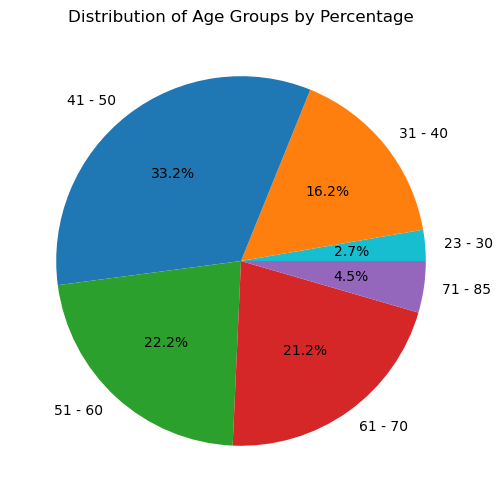

In [211]:
plt.figure(figsize = (9, 6))
colors = ['#17becf', '#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']
plt.pie(data = food_percent, labels = 'Age Group', x = 'percentage', autopct='%1.1f%%', colors = colors)
plt.title('Distribution of Age Groups by Percentage')
plt.show()

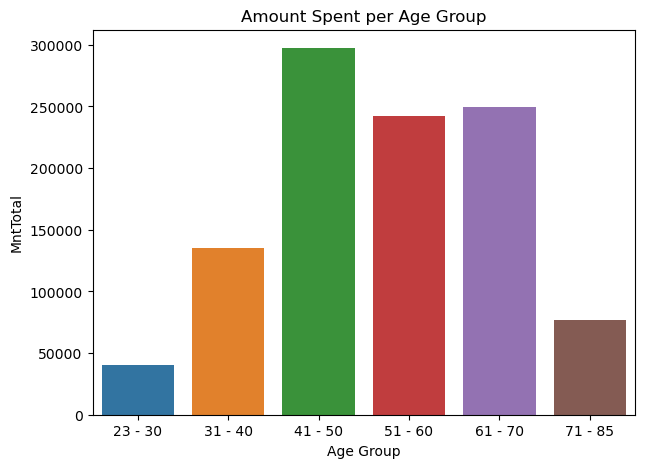

In [123]:
amt_age_grouped = food.groupby('Age Group')['MntTotal'].sum().reset_index()
plt.figure(figsize = (7, 5))
sns.barplot(data = amt_age_grouped, x = 'Age Group', y = 'MntTotal', hue = 'Age Group')
plt.title('Amount Spent per Age Group')
plt.show()

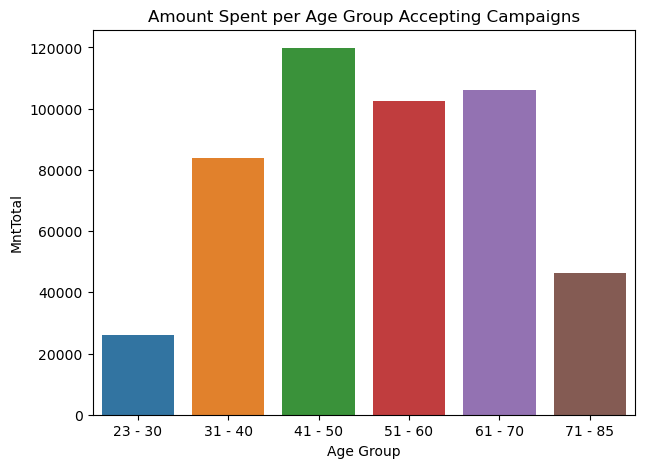

In [127]:
filtered_grouped = food[food['Accepted_Campaigns'] != 0]
filtered_grouped = filtered_grouped.groupby('Age Group')['MntTotal'].sum().reset_index()
plt.figure(figsize = (7, 5))
sns.barplot(data = filtered_grouped, x = 'Age Group', y = 'MntTotal', hue = 'Age Group')
plt.title('Amount Spent per Age Group Accepting Campaigns')
plt.show()

In [129]:
platform_purchases = food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
platform_purchases.rename(columns = {'index': 'Type of purchase', 0:'Sums'}, inplace = True)

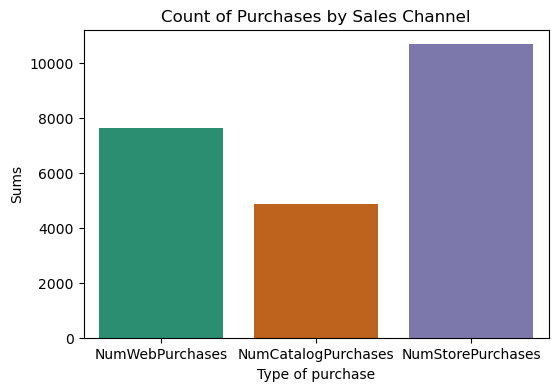

In [135]:
plt.figure(figsize = (6, 4))
sns.barplot(data = platform_purchases, x = 'Type of purchase', y = 'Sums', hue = 'Type of purchase', palette = 'Dark2')
plt.title('Count of Purchases by Sales Channel')
plt.show()

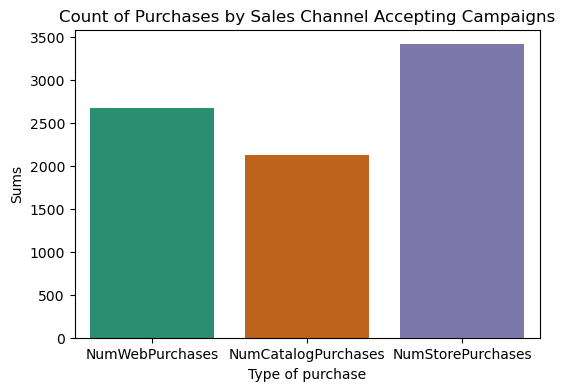

In [137]:
filtered_grouped = food[food['Accepted_Campaigns'] != 0]
platform_purchases_filtered = filtered_grouped[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
platform_purchases_filtered.rename(columns = {'index': 'Type of purchase', 0:'Sums'}, inplace = True)
plt.figure(figsize = (6, 4))
sns.barplot(data = platform_purchases_filtered, x = 'Type of purchase', y = 'Sums', hue = 'Type of purchase', palette = 'Dark2')
plt.title('Count of Purchases by Sales Channel Accepting Campaigns')
plt.show()

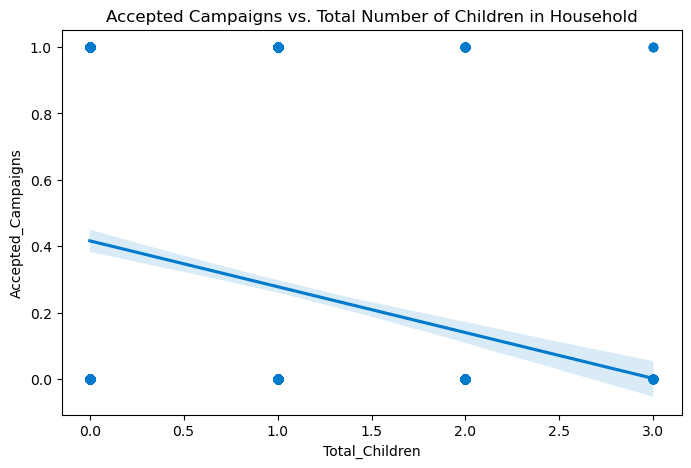

In [171]:
plt.figure(figsize = (8, 5))
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food, color = '#007acc')
plt.title('Accepted Campaigns vs. Total Number of Children in Household')
plt.show()


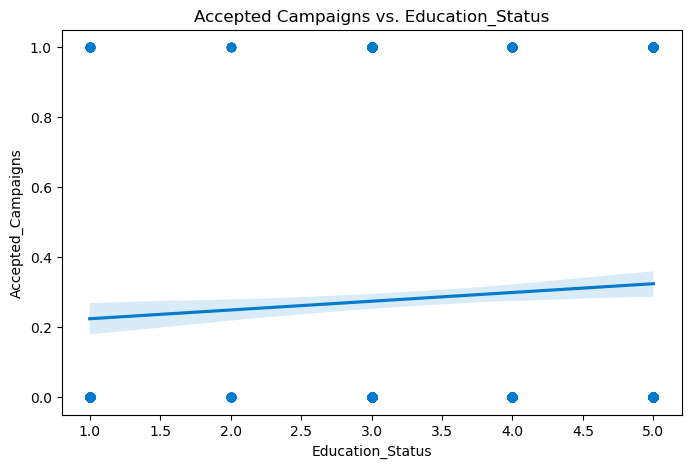

In [173]:
plt.figure(figsize = (8, 5))
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food, color = '#007acc')
plt.title('Accepted Campaigns vs. Education_Status')
plt.show()

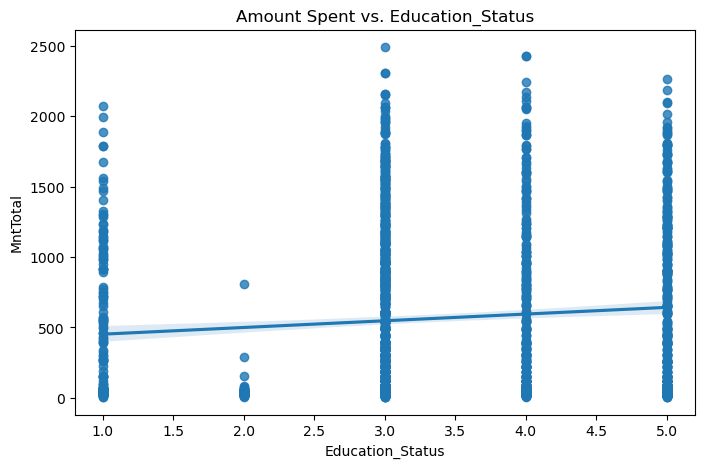

In [193]:
plt.figure(figsize = (8, 5))
sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food)
plt.title('Amount Spent vs. Education_Status')
plt.show()

In [195]:
rel_food = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

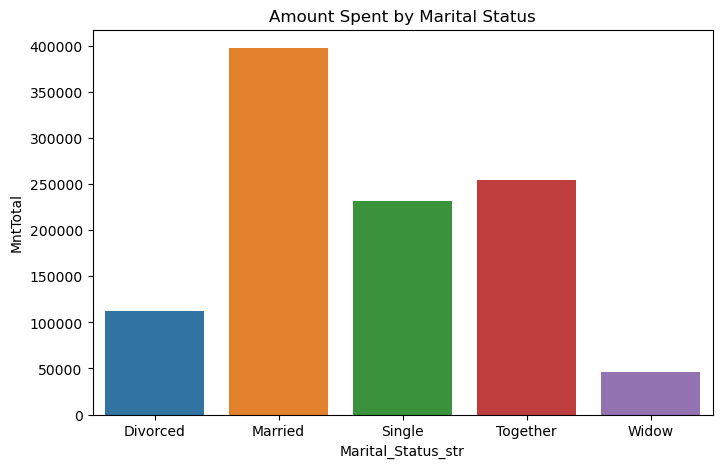

In [197]:
plt.figure(figsize = (8, 5))
sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', data = rel_food, hue = 'Marital_Status_str')
plt.title('Amount Spent by Marital Status')
plt.show()

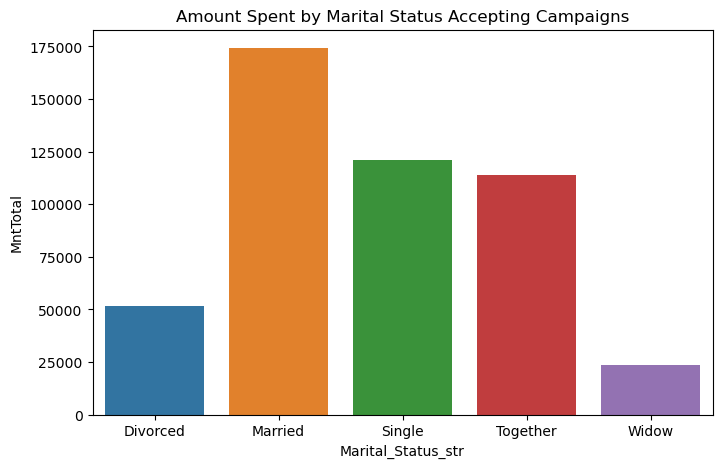

In [199]:
filtered_grouped = food[food['Accepted_Campaigns'] != 0]
rel_food_filtered = filtered_grouped.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
plt.figure(figsize = (8, 5))
sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', data = rel_food_filtered, hue = 'Marital_Status_str')
plt.title('Amount Spent by Marital Status Accepting Campaigns')
plt.show()

In [201]:
total = food['Marital_Status_str'].value_counts()
filtered_marital = food[food['Accepted_Campaigns'] != 0]
marital_count = filtered_marital['Marital_Status_str'].value_counts()
marital_percentage = (marital_count/total)*100
marital_percent = pd.DataFrame(marital_percentage).reset_index()
marital_percent.columns = ['Marital Status', 'Percentages Accepting Campaigns']

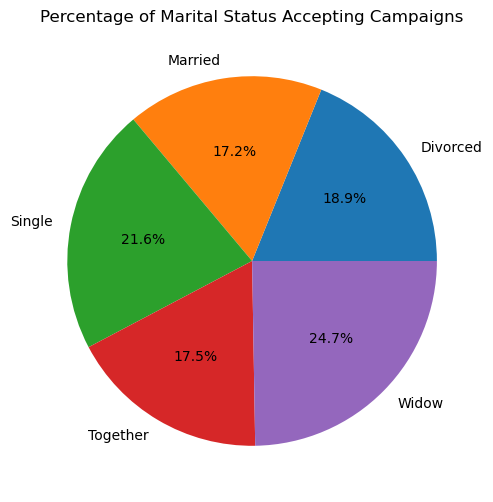

In [209]:
plt.figure(figsize = (9, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.pie(x = 'Percentages Accepting Campaigns', labels = 'Marital Status', data = marital_percent, autopct='%1.1f%%', colors = colors)
plt.title('Percentage of Marital Status Accepting Campaigns')
plt.show()

## Phase 5: Share

### 5.1 Insights from Analysis

- Spending Patterns by Age:
**Customers aged 30 to 70 tend to spend more money**. However, they are less likely to accept campaigns compared to other age groups. Despite the high spending, campaign acceptance is relatively lower in this segment.

- Campaign Acceptance by Sales Channel:
**Customers are more likely to accept campaigns through catalogs**. However, in-person purchases generate higher spending. It is recommended to **allocate campaign resources with a split of 40% to catalogs, 30% to online channels, and 30% to in-person interactions**.

- Focus on Family Structure:
**Target customers with no children or fewer children**, as they show higher engagement and spending patterns in response to campaigns.

- Impact of Education Level:
**Education level does not significantly impact campaign acceptance or spending**. Therefore, targeting based on educational background is not recommended.

- Marital Status Influence:
**Marital status does not play a significant role in spending or campaign acceptance**. However, the marital categories of Married, Single, and Together generally spend more money.

## Phase 6: Act

### 6.1 Recommendations


- **Focus on middle-aged individuals with higher earnings and no children to make more money**. Tailor campaigns to different platforms based on their response patterns, with an allocation split as recommended above.

-  **Encourage new users to spend more** by focusing on engaging strategies that prompt higher spending.

-  **Special attention should be given to customers aged 21-30 and those aged 70 and above**, as they    statistically exhibit higher rates of campaign acceptance.